In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=250
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the data

df=pd.read_excel(r"C:\Users\Prerana\Downloads\CocaCola_Sales_Rawdata.xlsx", parse_dates=True)
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


EDA

In [3]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


<AxesSubplot:>

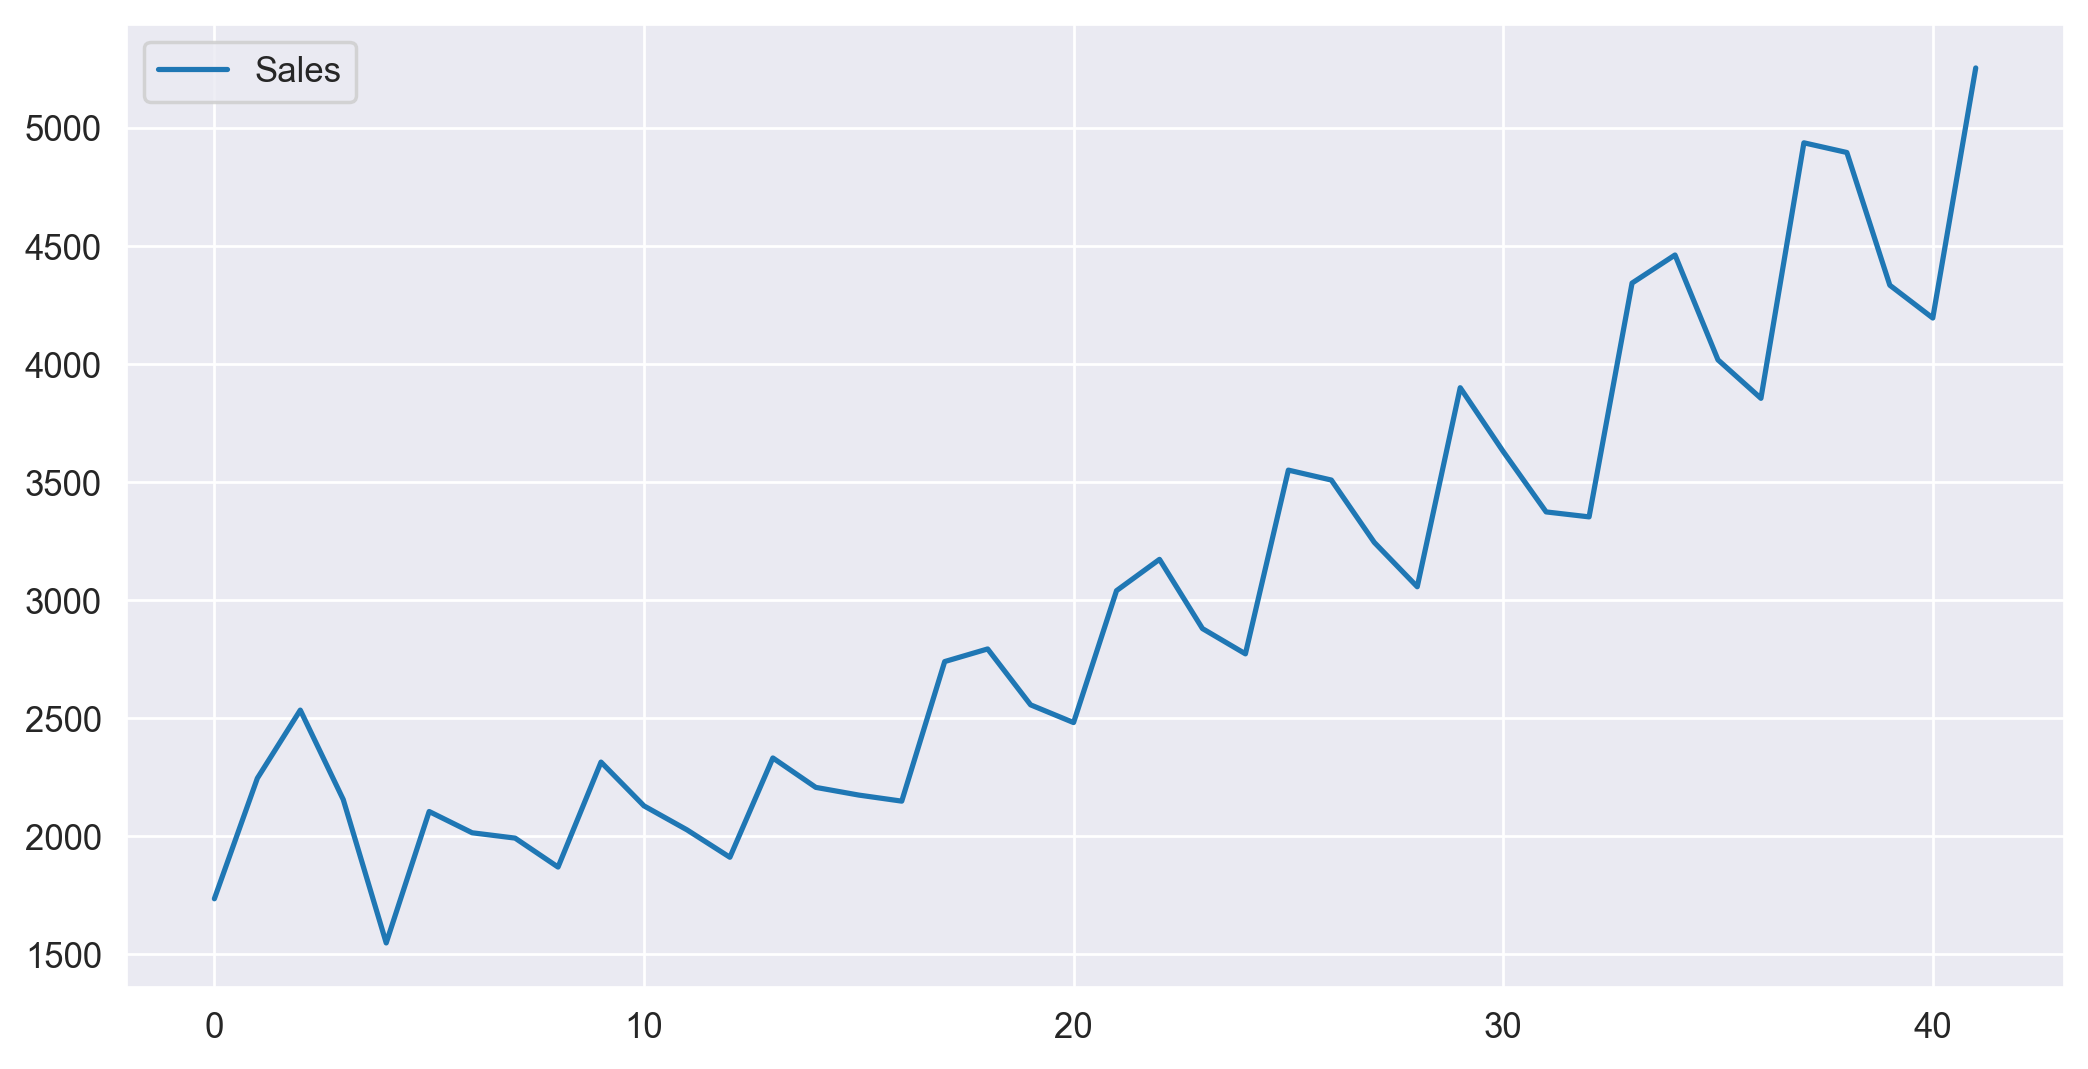

In [4]:
df.plot()

In [5]:
df['t']=np.arange(1,43)
df['log_Sales']=np.log(df['Sales'])
df['t_square']=df['t']*df['t']
df.head()

,Quarter,Sales,t,log_Sales,t_square
0,Q1_86,1734.827000,1,7.458663,1
1,Q2_86,2244.960999,2,7.716443,4
2,Q3_86,2533.804993,3,7.837477,9
3,Q4_86,2154.962997,4,7.675529,16
4,Q1_87,1547.818996,5,7.344602,25


In [6]:
quarter =['Q1','Q2','Q3','Q4']
p = df["Quarter"][0]
p[0:2]
df['quarter']= 0

for i in range(42):
    p = df["Quarter"][i]
    df['quarter'][i]= p[0:2]

df.head()

,Quarter,Sales,t,log_Sales,t_square,quarter
0,Q1_86,1734.827000,1,7.458663,1,Q1
1,Q2_86,2244.960999,2,7.716443,4,Q2
2,Q3_86,2533.804993,3,7.837477,9,Q3
3,Q4_86,2154.962997,4,7.675529,16,Q4
4,Q1_87,1547.818996,5,7.344602,25,Q1


In [7]:
quarter_dummies = pd.DataFrame(pd.get_dummies(df['quarter']))
data = pd.concat([df,quarter_dummies],axis = 1)
data.head()

,Quarter,Sales,t,log_Sales,t_square,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,1,7.458663,1,Q1,1,0,0,0
1,Q2_86,2244.960999,2,7.716443,4,Q2,0,1,0,0
2,Q3_86,2533.804993,3,7.837477,9,Q3,0,0,1,0
3,Q4_86,2154.962997,4,7.675529,16,Q4,0,0,0,1
4,Q1_87,1547.818996,5,7.344602,25,Q1,1,0,0,0


In [8]:
Train=data.head(26)
Test=data.tail(16)

In [9]:
Train

,Quarter,Sales,t,log_Sales,t_square,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,1,7.458663,1,Q1,1,0,0,0
1,Q2_86,2244.960999,2,7.716443,4,Q2,0,1,0,0
2,Q3_86,2533.804993,3,7.837477,9,Q3,0,0,1,0
3,Q4_86,2154.962997,4,7.675529,16,Q4,0,0,0,1
4,Q1_87,1547.818996,5,7.344602,25,Q1,1,0,0,0
5,Q2_87,2104.411995,6,7.651791,36,Q2,0,1,0,0
6,Q3_87,2014.362999,7,7.608058,49,Q3,0,0,1,0
7,Q4_87,1991.746998,8,7.596767,64,Q4,0,0,0,1
8,Q1_88,1869.049999,9,7.533186,81,Q1,1,0,0,0
9,Q2_88,2313.631996,10,7.746574,100,Q2,0,1,0,0


In [10]:
Test

,Quarter,Sales,t,log_Sales,t_square,quarter,Q1,Q2,Q3,Q4
26,Q3_92,3508.000000,27,8.162801,729,Q3,0,0,1,0
27,Q4_92,3243.859993,28,8.084519,784,Q4,0,0,0,1
28,Q1_93,3056.000000,29,8.024862,841,Q1,1,0,0,0
29,Q2_93,3899.000000,30,8.268475,900,Q2,0,1,0,0
30,Q3_93,3629.000000,31,8.196712,961,Q3,0,0,1,0
31,Q4_93,3373.000000,32,8.123558,1024,Q4,0,0,0,1
32,Q1_94,3352.000000,33,8.117312,1089,Q1,1,0,0,0
33,Q2_94,4342.000000,34,8.376090,1156,Q2,0,1,0,0
34,Q3_94,4461.000000,35,8.403128,1225,Q3,0,0,1,0
35,Q4_94,4017.000000,36,8.298291,1296,Q4,0,0,0,1


In [11]:
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

In [12]:
#linear model

linear=smf.ols('Sales~t',data=Train).fit()
pred_linear=pd.Series(linear.predict(pd.DataFrame(Test['t'])))
rmse_linear=np.sqrt(mean_squared_error(Test['Sales'],pred_linear))
rmse_linear

815.2212337877677

In [13]:
#Exponential model

Exp=smf.ols('log_Sales~t',data=Train).fit()
pred_exp=pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_exp=np.sqrt(mean_squared_error(Test['Sales'],pred_exp))
rmse_exp

4063.0125694410863

In [14]:
#Quadratic model

Quad = smf.ols('Sales~t+t_square',data=Train).fit()
pred_quad=pd.Series(Quad.predict(pd.DataFrame(Test[["t","t_square"]])))
rmse_quad=np.sqrt(mean_squared_error(Test['Sales'],pred_quad))
rmse_quad

900.8872520769615

In [15]:
#Additive Seasonality

add= smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add=pd.Series(add.predict(Test[['Q1','Q2','Q3','Q4']]))
rmse_add=np.sqrt(mean_squared_error(Test['Sales'],pred_add))
rmse_add

1743.8069219832867

In [16]:
#Additive Seasonality with quadratic

add_quad=smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_quad=pd.Series(add_quad.predict(Test[["t","t_square",'Q1','Q2','Q3','Q4']]))
rmse_add_quad=np.sqrt(mean_squared_error(Test['Sales'],pred_add_quad))
rmse_add_quad

910.6437527263045

In [17]:
#Multiplicative seasonality

mul=smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=Train).fit()
pred_mul=pd.Series(mul.predict(Test[['t','Q1','Q2','Q3','Q4']]))
rmse_mul=np.sqrt(mean_squared_error(Test['Sales'],pred_mul))
rmse_mul

4063.0112599255226

In [18]:
#compare the results

d1={'MODEL': pd.Series(['rmse_linear','rmse_exp','rmse_quad','rmse_add','rmse_add_quad','rmse_mul']),'RMSE_values':pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add,rmse_add_quad,rmse_mul])}
table_rmse=pd.DataFrame(d1)
table_rmse.sort_values(['RMSE_values'])

,MODEL,RMSE_values
0,rmse_linear,815.221234
2,rmse_quad,900.887252
4,rmse_add_quad,910.643753
3,rmse_add,1743.806922
5,rmse_mul,4063.011260
1,rmse_exp,4063.012569


The best model is linear model